In [1]:
import pyroomacoustics as pra
import numpy as np
from pydub import AudioSegment

import sys
sys.path.append("../")
from src.file_io import load_signal_from_wav, write_signal_to_wav
from src.visualization_tools import plot_room, plot_room_views, play_audio
from src.simulation_data_utils import create_outdoor_room, circular_layout, perform_simulation

np.random.seed(0)

部屋を作成

In [2]:
room_dim = np.array([50, 50, 50])  # 部屋の大きさ（x, y, z）
fs = 16000

room = create_outdoor_room(room_dim, fs)

マイク配置

In [3]:
height = 10  # マイクアレイの高さ（メートル）
center = room_dim / 2  # 部屋の中心をマイクアレイの中心とする
center[2] = height  # マイクアレイの高さを設定
radius = 0.05  # マイクアレイの半径（メートル）
num_mics = 8  # マイクの数

# マイクアレイの位置を計算
mic_positions = circular_layout(center, radius, num_mics)

# マイクロフォンアレイを作成して部屋に配置
mic_array = pra.MicrophoneArray(mic_positions, room.fs)
room.add_microphone_array(mic_array)

ドローンのプロペラ配置

In [4]:
num_sources = 4  # 音源の数（ドローンのプロペラ数）
source_radius = 0.2  # 音源配置の半径（メートル）
diff_z = 5
source_shift = np.array([0, 0, diff_z])  # 音源のずれ（メートル）

source_path = "../data/raw/propeller/self_record/2023-07-07.wav"
source_signal = load_signal_from_wav(source_path, room.fs)

# 最初の5秒だけ取り出す（人の声に比べてドローンの音が長いので）
duration = 5
num_samples = duration * room.fs
source_signal = source_signal[:num_samples]

# 音源の位置を計算
source_positions = circular_layout(center + source_shift, source_radius, num_sources)

# 音源を部屋に追加
for pos in source_positions.T:
    room.add_source(pos, signal=source_signal)

人の声の配置

In [5]:
# 人の声の音源の座標とパスを設定
human_voice_position = np.array([35, 25, 0])
human_voice_path = "../data/raw/sample/arctic_a0001.wav"

# 人の声の音源を読み込む
human_voice_signal = load_signal_from_wav(human_voice_path, room.fs)

# 人の声の音源を部屋に追加
room.add_source(human_voice_position, signal=human_voice_signal)

# 人の声の音源の座標とパスを設定
human_voice_position = np.array([15, 20, 0])
human_voice_path = "../data/raw/sample/arctic_a0002.wav"

# 人の声の音源を読み込む
human_voice_signal = load_signal_from_wav(human_voice_path, room.fs)

# 人の声の音源を部屋に追加
room.add_source(human_voice_position, signal=human_voice_signal)

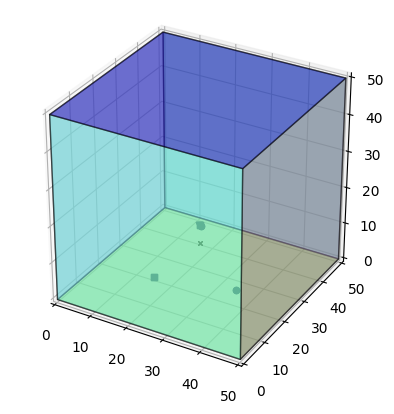

In [6]:
plot_room(room)

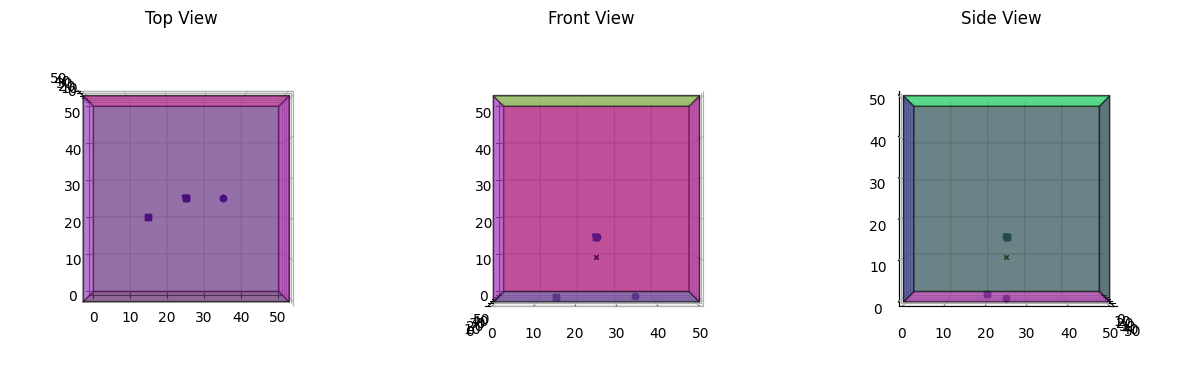

In [7]:
plot_room_views(room)

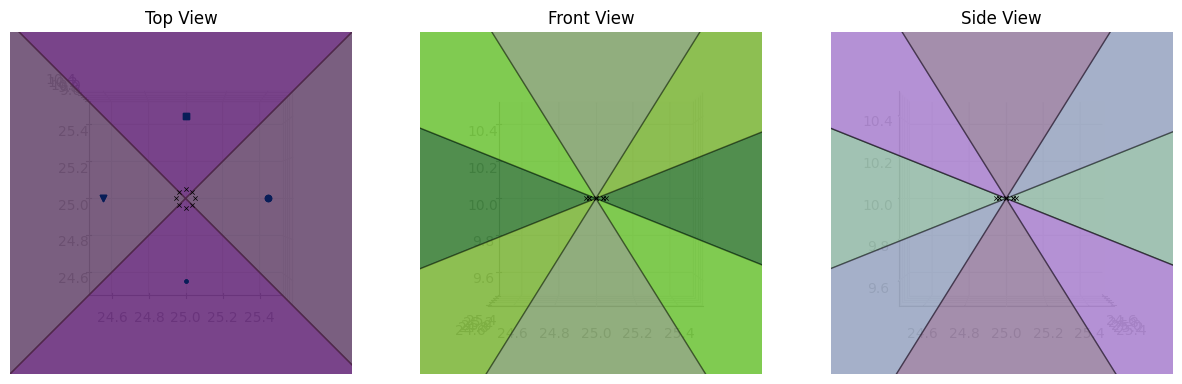

In [8]:
plot_room_views(room, zoom_center=center, zoom_size=1)

シミュレーション

In [9]:
simulated_signals = perform_simulation(room)

All sources and microphones are inside the room.


In [10]:
play_audio(simulated_signals[0], fs)

In [11]:
simulated_signals.shape

(8, 121600)

In [12]:
write_signal_to_wav(simulated_signals, f"../data/simulation/drone_{diff_z}.wav", fs)